In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
def generate_data(num_records):
  rand_data = []

  for i in range(num_records):
      rand_data.append([random.randint(25,50), random.randint(10, 250) *10000, random.randint(1,5), random.randint(0,1)])

  return rand_data


In [ ]:
  df = pd.DataFrame(generate_data(500), columns=['Age', 'Salary', 'CountFamilyMembers', 'BuysFlat'])
  display(df)

,Age,Salary,CountFamilyMembers,BuysFlat
0,35,2000000,5,1
1,26,1520000,5,1
2,49,1070000,4,0
3,46,250000,4,0
4,41,1480000,5,0
...,...,...,...,...
495,26,280000,1,0
496,34,1610000,4,0
497,46,710000,5,0
498,30,370000,1,0


In [ ]:
X=df.drop('BuysFlat', axis=1)
Y=df['BuysFlat']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, stratify=Y, random_state=1)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)
print(Y.mean(), Y_train.mean(), Y_test.mean())

(500, 3) (350, 3) (150, 3)
(500,) (350,) (150,)
0.508 0.5085714285714286 0.5066666666666667


In [ ]:
print(X.mean(), X_train.mean(), X_test.mean())

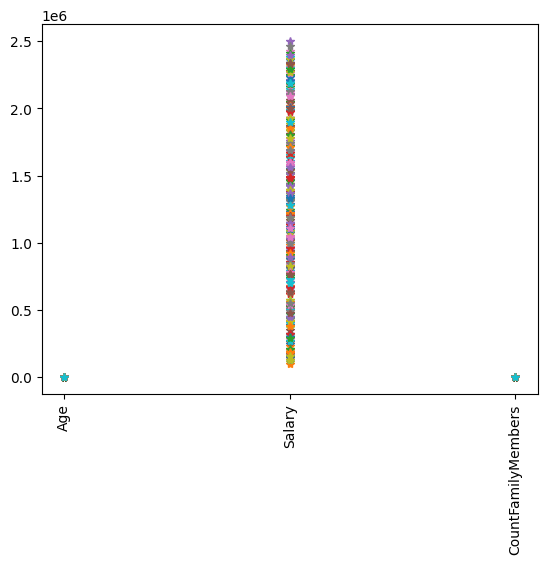

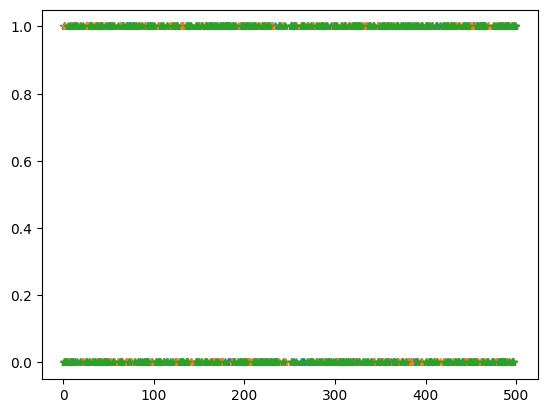

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X_train.T, '*')
plt.xticks(rotation='vertical')
plt.show()
# x_binarised_3_train = X_train['Salary'].map(lambda x: 0 if x < 1.3e+06 else 1)
x_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])
plt.plot(x_binarised_train, '*')
x_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])

x_binarised_test = x_binarised_test.values
x_binarised_train = x_binarised_train.values

In [ ]:
class MPNeuron:

    def __init__(self):
        self.b = None

    def model(self, x):
        return(sum(x) >= self.b)

    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)

    def fit(self, X, Y):
        accuracy = {}

        for b in range(X.shape[1] + 1):
            self.b = b
            Y_pred = self.predict(X)
            accuracy[b] = accuracy_score(Y_pred, Y)

        best_b = max(accuracy,key = accuracy.get)
        self.b = best_b

        print('Optimal Value of  is', best_b)
        print('Highest accuracy is',accuracy[best_b])

In [ ]:
mp_neuron = MPNeuron()
mp_neuron.fit(x_binarised_train, Y_train)

Optimal Value of  is 1
Highest accuracy is 0.52


In [ ]:
Y_test_pred = mp_neuron.predict(x_binarised_test)
accuracy_test = accuracy_score(Y_test_pred, Y_test)

In [ ]:
print(accuracy_test)

0.5066666666666667
